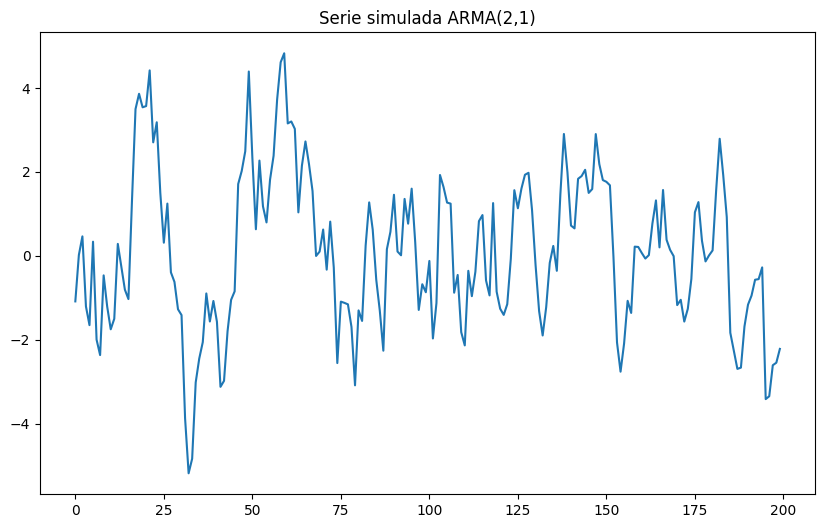

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import statsmodels.api as sm

# Simulación de un ejemplo ARMA
# X_t = φ₁X_{t-1} + φ₂X_{t-2} + Z_t + θZ_{t-1}
# con φ₁ = -0.2, φ₂ = -0.48 y θ = 0.7

phi1 = 0.2
phi2 = 0.48
theta = 0.7
Tlength = 200
np.random.seed(123)

# Simulación del proceso ARMA(2,1)
ar = np.array([1, -phi1, -phi2])
ma = np.array([1, theta])
y = sm.tsa.arma_generate_sample(ar=ar, ma=ma, nsample=Tlength)

# Gráfico de la serie
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.title('Serie simulada ARMA(2,1)')
plt.show()


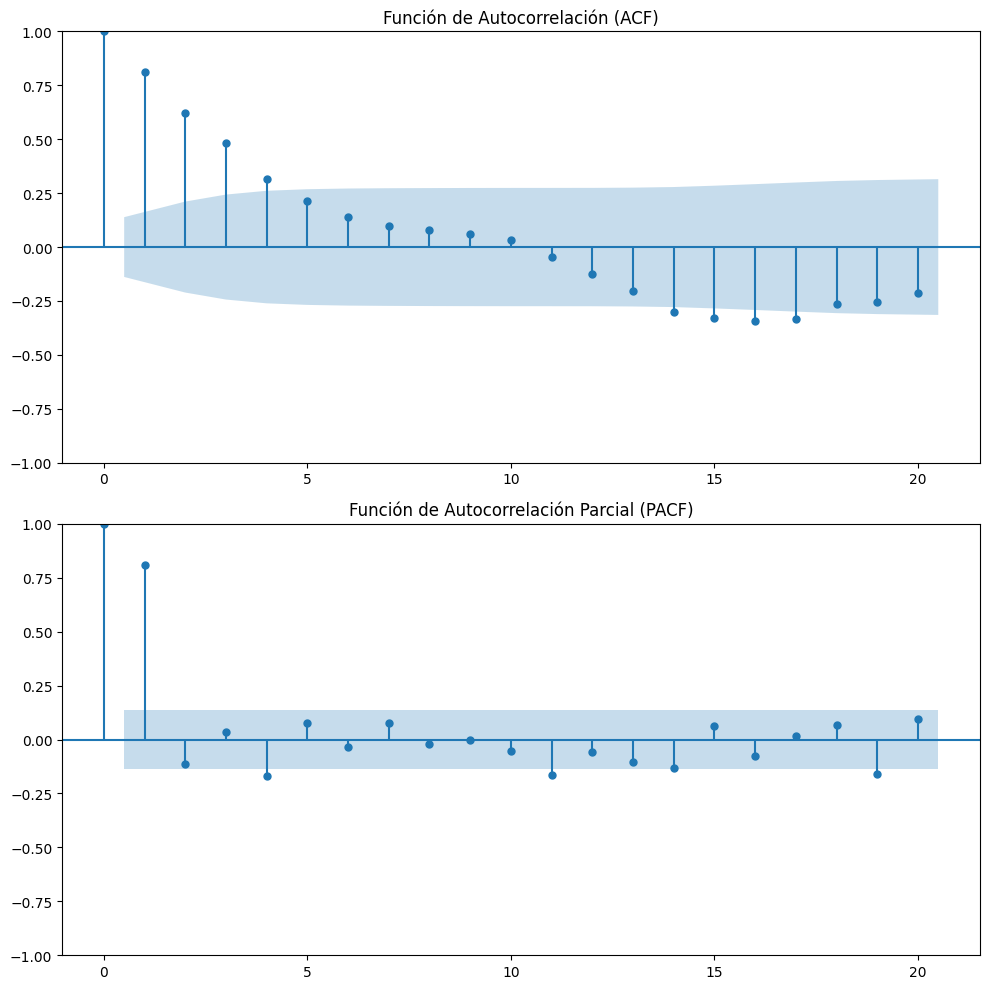

In [2]:

# Búsqueda de p, q vía ACF y PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# ACF
sm.graphics.tsa.plot_acf(y, lags=20, ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(y, lags=20, ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()


In [6]:
# Modelo 1 propuesto: AR(1)
modelo_propuesto1 = ARIMA(y, order=(1, 0, 0), trend='c').fit()
print(modelo_propuesto1.summary())

# Reestimación quitando la constante si no es significativa
pvalues = modelo_propuesto1.pvalues
if len(pvalues) > 1:  # Verifica si hay más de un parámetro (incluyendo la constante)
    const_pvalue = pvalues[-1]  # El último p-valor suele ser el de la constante
    if const_pvalue > 0.05:
        modelo_propuesto1 = ARIMA(y, order=(1, 0, 0), trend='n').fit()
        print(modelo_propuesto1.summary())

print(f"AIC: {modelo_propuesto1.aic}")
print(f"BIC: {modelo_propuesto1.bic}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -297.313
Date:                Fri, 20 Sep 2024   AIC                            600.625
Time:                        09:13:37   BIC                            610.520
Sample:                             0   HQIC                           604.629
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.405     -0.018      0.986      -0.801       0.787
ar.L1          0.8147      0.044     18.409      0.000       0.728       0.901
sigma2         1.1386      0.114      9.986      0.0

In [7]:
# Modelo 2 propuesto: MA(4)
modelo_propuestoMA4 = ARIMA(y, order=(0, 0, 4), trend='c').fit()
print(modelo_propuestoMA4.summary())

# Reestimación quitando la constante si no es significativa
pvalues = modelo_propuestoMA4.pvalues
if len(pvalues) > 4:  # Verifica si hay más de 4 parámetros (4 MA + constante)
    const_pvalue = pvalues[-1]  # El último p-valor suele ser el de la constante
    if const_pvalue > 0.05:
        modelo_propuestoMA4 = ARIMA(y, order=(0, 0, 4), trend='n').fit()
        print(modelo_propuestoMA4.summary())

# Si ma.L4 no es significativo, lo omitimos
if len(pvalues) >= 4:
    if pvalues[3] > 0.05:  # El cuarto p-valor corresponde a ma.L4
        modelo_propuestoMA4 = ARIMA(y, order=(0, 0, 3), trend='n').fit()
        print(modelo_propuestoMA4.summary())

print(f"AIC: {modelo_propuestoMA4.aic}")
print(f"BIC: {modelo_propuestoMA4.bic}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -296.476
Date:                Fri, 20 Sep 2024   AIC                            604.951
Time:                        09:13:58   BIC                            624.741
Sample:                             0   HQIC                           612.960
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0393      0.250      0.157      0.875      -0.450       0.529
ma.L1          0.9376      0.072     12.933      0.000       0.796       1.080
ma.L2          0.5910      0.097      6.109      0.0

In [9]:

# Modelo 3 propuesto: ARMA(1,4)
modelo_propuesto_arma = ARIMA(y, order=(1, 0, 4)).fit()
print(modelo_propuesto_arma.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -291.893
Date:                Fri, 20 Sep 2024   AIC                            597.786
Time:                        09:14:30   BIC                            620.874
Sample:                             0   HQIC                           607.129
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0144      0.360      0.040      0.968      -0.692       0.721
ar.L1          0.7116      0.163      4.354      0.000       0.391       1.032
ma.L1          0.2304      0.186      1.239      0.2

In [10]:
# Refinamiento del modelo ARMA
# (Este proceso puede requerir múltiples iteraciones y juicio del analista)
# Aquí se muestra un ejemplo simplificado
modelo_propuesto_arma_refinado = ARIMA(y, order=(1, 0, 2), trend='n').fit()
print(modelo_propuesto_arma_refinado.summary())

print(f"AIC: {modelo_propuesto_arma_refinado.aic}")
print(f"BIC: {modelo_propuesto_arma_refinado.bic}")


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -295.232
Date:                Fri, 20 Sep 2024   AIC                            598.465
Time:                        09:14:43   BIC                            611.658
Sample:                             0   HQIC                           603.804
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7994      0.075     10.667      0.000       0.653       0.946
ma.L1          0.1454      0.109      1.339      0.181      -0.067       0.358
ma.L2         -0.1113      0.099     -1.123      0.2

In [11]:

# Ajuste del modelo teórico ARMA(2,1)
modelo_teorico = ARIMA(y, order=(2, 0, 1), trend='n').fit()
print(modelo_teorico.summary())

print(f"AIC: {modelo_teorico.aic}")
print(f"BIC: {modelo_teorico.bic}")



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -292.993
Date:                Fri, 20 Sep 2024   AIC                            593.987
Time:                        09:14:54   BIC                            607.180
Sample:                             0   HQIC                           599.326
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1522      0.191      0.799      0.425      -0.221       0.526
ar.L2          0.4973      0.173      2.880      0.004       0.159       0.836
ma.L1          0.8013      0.156      5.142      0.0

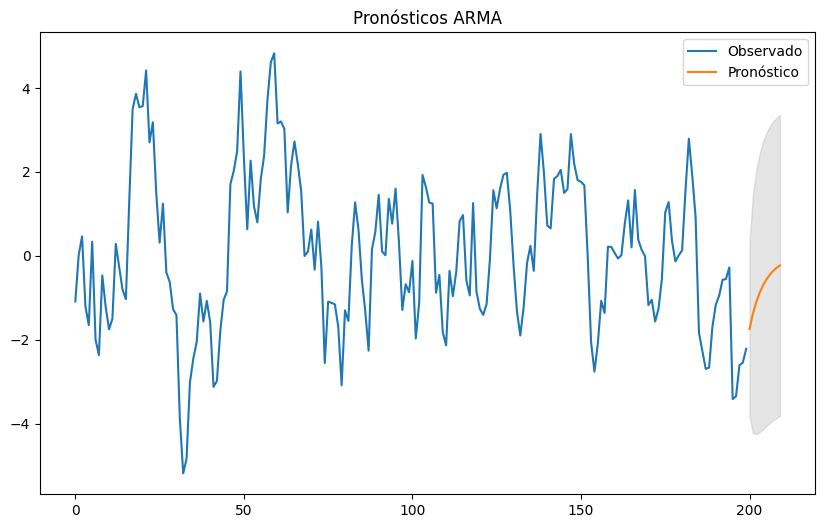

In [15]:
forecast_result = modelo_propuesto_arma_refinado.get_forecast(steps=10)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(y, label='Observado')
plt.plot(np.arange(len(y), len(y) + 10), forecast_mean, label='Pronóstico')
plt.fill_between(np.arange(len(y), len(y) + 10),
                 forecast_ci[:, 0],  # Límite inferior
                 forecast_ci[:, 1],  # Límite superior
                 color='gray', alpha=0.2)
plt.legend()
plt.title('Pronósticos ARMA')
plt.show()

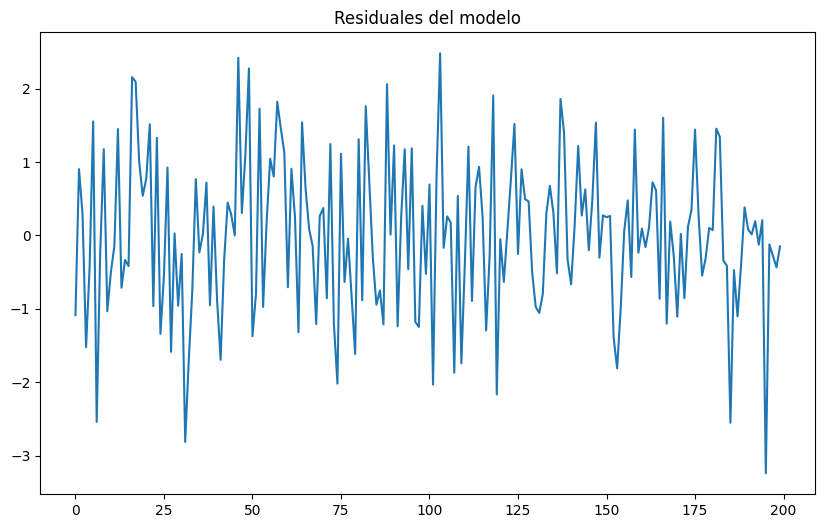

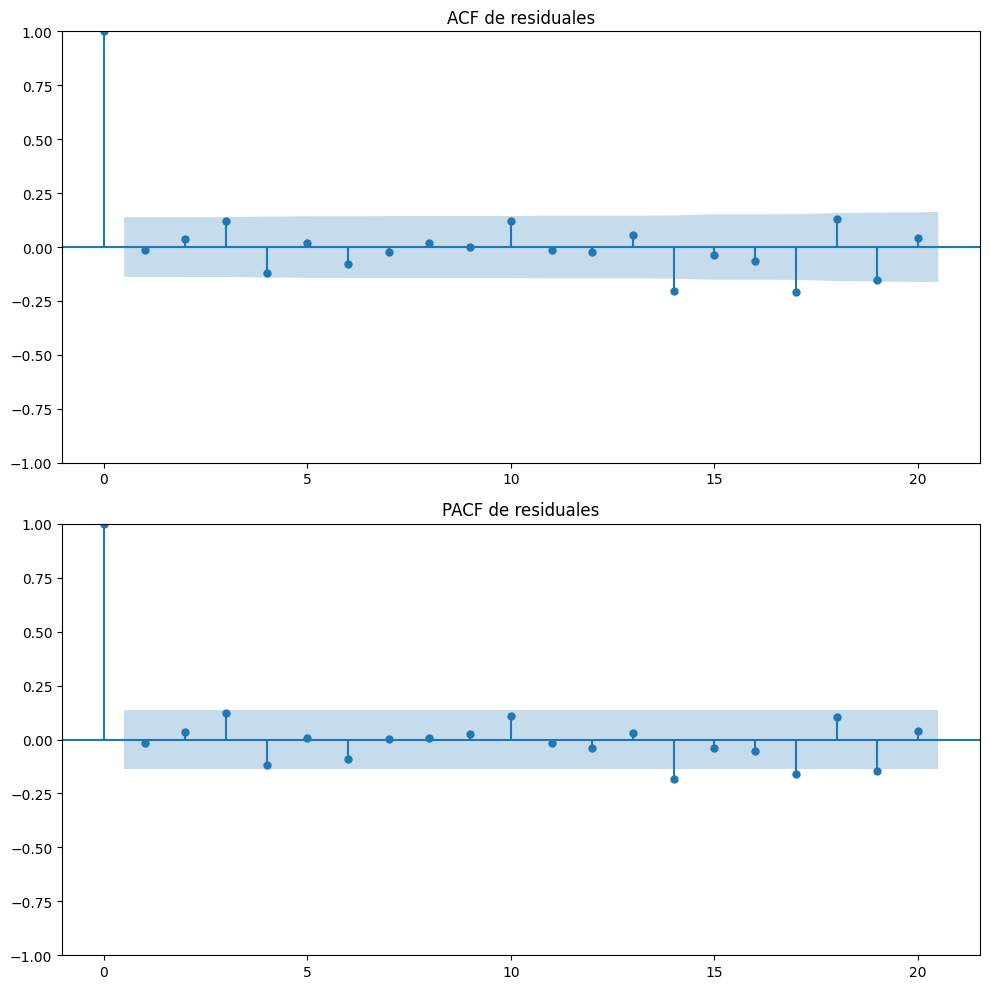

Test de Ljung-Box:
      lb_stat  lb_pvalue
20  40.930594   0.003802

Test de Jarque-Bera:
Estadístico: 0.5420113646479542, p-valor: 0.7626121629833745


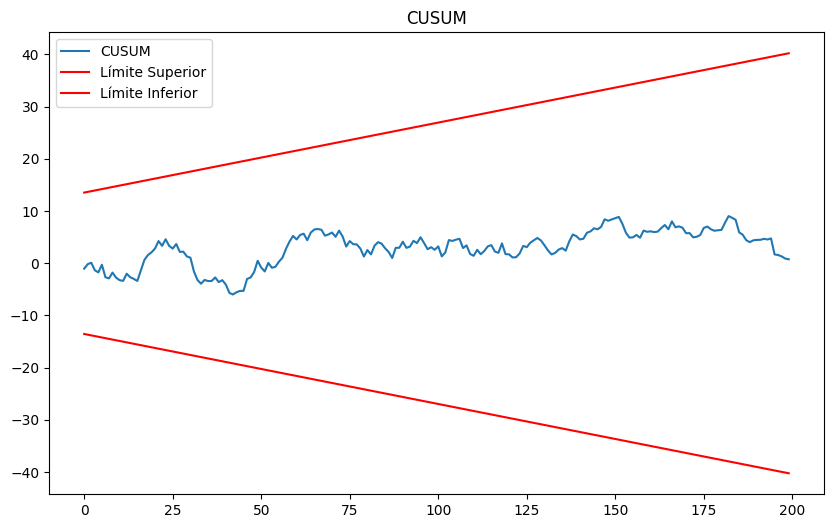

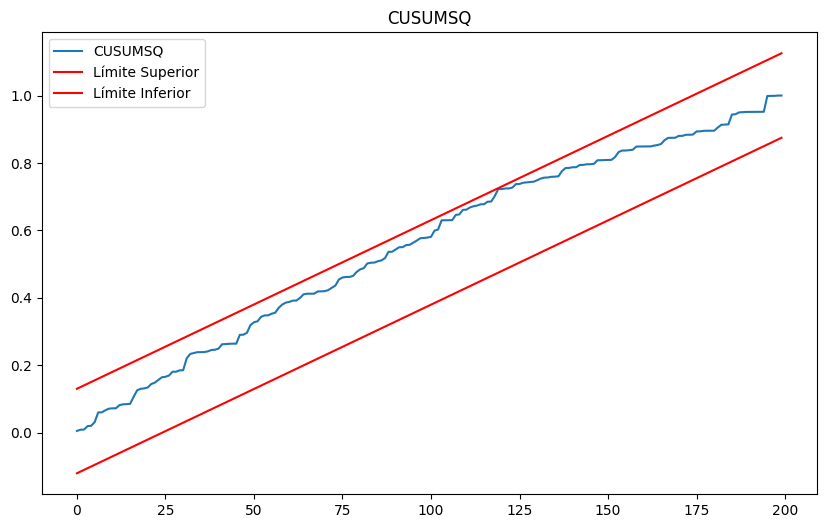

In [17]:

# Análisis de residuales
residuales = modelo_propuesto_arma_refinado.resid

# Gráfico de residuales
plt.figure(figsize=(10, 6))
plt.plot(residuales)
plt.title('Residuales del modelo')
plt.show()

# ACF y PACF de residuales
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
sm.graphics.tsa.plot_acf(residuales, lags=20, ax=ax1)
ax1.set_title('ACF de residuales')
sm.graphics.tsa.plot_pacf(residuales, lags=20, ax=ax2)
ax2.set_title('PACF de residuales')
plt.tight_layout()
plt.show()

# Test de Ljung-Box
lb_test = acorr_ljungbox(residuales, lags=[20], return_df=True)
print("Test de Ljung-Box:")
print(lb_test)

# Test de normalidad de Jarque-Bera
jb_test = stats.jarque_bera(residuales)
print("\nTest de Jarque-Bera:")
print(f"Estadístico: {jb_test.statistic}, p-valor: {jb_test.pvalue}")

# CUSUM y CUSUMSQ
res = residuales
cum = np.cumsum(res) / np.std(res)
N = len(res)
cumq = np.cumsum(res**2) / np.sum(res**2)

Af = 0.948  # Cuantil del 95% para la estadística CUSUM
co = 0.12531  # Valor del cuantil aproximado para CUSUMSQ para n/2

LS = Af * np.sqrt(N) + 2 * Af * np.arange(1, N+1) / np.sqrt(N)
LI = -LS
LQS = co + np.arange(1, N+1) / N
LQI = -co + np.arange(1, N+1) / N

# Gráfico CUSUM
plt.figure(figsize=(10, 6))
plt.plot(cum, label='CUSUM')
plt.plot(LS, 'r', label='Límite Superior')
plt.plot(LI, 'r', label='Límite Inferior')
plt.title('CUSUM')
plt.legend()
plt.show()

# Gráfico CUSUMSQ
plt.figure(figsize=(10, 6))
plt.plot(cumq, label='CUSUMSQ')
plt.plot(LQS, 'r', label='Límite Superior')
plt.plot(LQI, 'r', label='Límite Inferior')
plt.title('CUSUMSQ')
plt.legend()
plt.show()